<a href="https://colab.research.google.com/github/Nehach73/DS3001_project1/blob/main/DS3001Project1Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/GianTheGoat/project_gss

fatal: destination path 'project_gss' already exists and is not an empty directory.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

gss = pd.read_parquet("/content/project_gss/gss_chunk_3.parquet")
gss = gss.dropna(how = "all")

In [4]:
filt = gss.filter(items = ["year", "occ" "wrkstat", "wrkslf", "hrs1", "income06",
                           "degree", "marital", "happy", "partyid"],axis=1)
yrgss = filt[(filt["year"] == 2006) | (filt["year"] == 2008) | (filt["year"] == 2010)]
yrgss

,year,wrkslf,hrs1,income06,degree,marital,happy,partyid
0,2006,someone else,40.0,$110000 to $129999,high school,married,NaN,"independent (neither, no response)"
1,2006,someone else,NaN,$75000 to $89999,bachelor's,never married,pretty happy,"independent (neither, no response)"
2,2006,someone else,35.0,$60000 to 74999,bachelor's,divorced,pretty happy,not very strong republican
3,2006,someone else,50.0,$35000 to 39999,high school,never married,NaN,not very strong republican
4,2006,someone else,40.0,$75000 to $89999,bachelor's,married,very happy,not very strong republican
...,...,...,...,...,...,...,...,...
6822,2010,someone else,NaN,$150000 or over,bachelor's,married,pretty happy,strong republican
6823,2010,someone else,NaN,$12500 to 14999,high school,widowed,not too happy,strong republican
6824,2010,someone else,40.0,$20000 to 22499,high school,separated,very happy,not very strong democrat
6825,2010,someone else,49.0,$6 000 to 6 999,bachelor's,divorced,pretty happy,"independent (neither, no response)"


<Axes: xlabel='hrs1', ylabel='Density'>

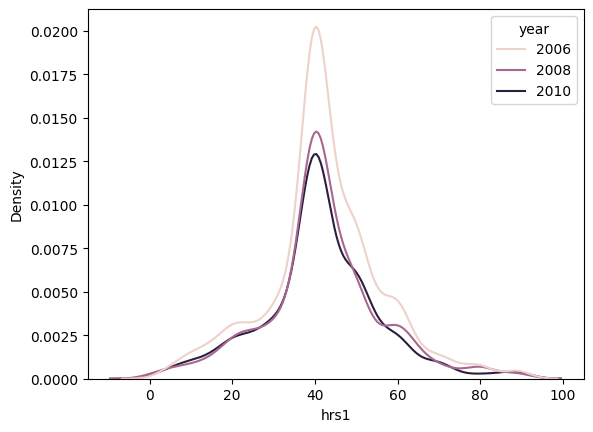

In [5]:
sns.kdeplot(data=yrgss,x="hrs1", hue = "year")

<ipython-input-6-e5d7b197a0eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yrgss['marital'] = yrgss['marital'].astype(str)


<Axes: xlabel='hrs1', ylabel='Density'>

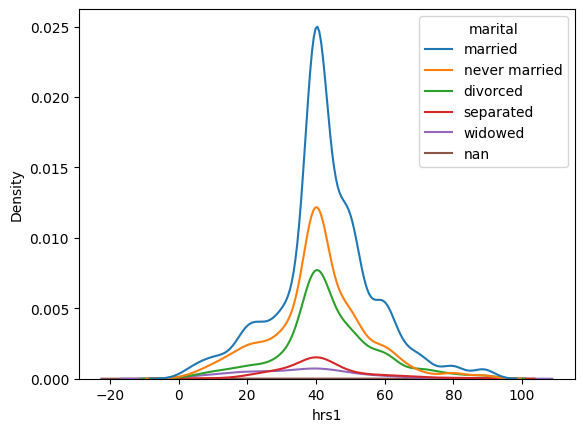

In [6]:
yrgss['marital'] = yrgss['marital'].astype(str)
sns.kdeplot(data=yrgss,x="hrs1", hue = "marital")

<ipython-input-7-dd1c041e5451>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yrgss['degree'] = yrgss['degree'].astype(str)


[Text(0.5, 1.0, 'Time Use'), Text(0.5, 0, 'Year'), Text(0, 0.5, 'Proportion')]

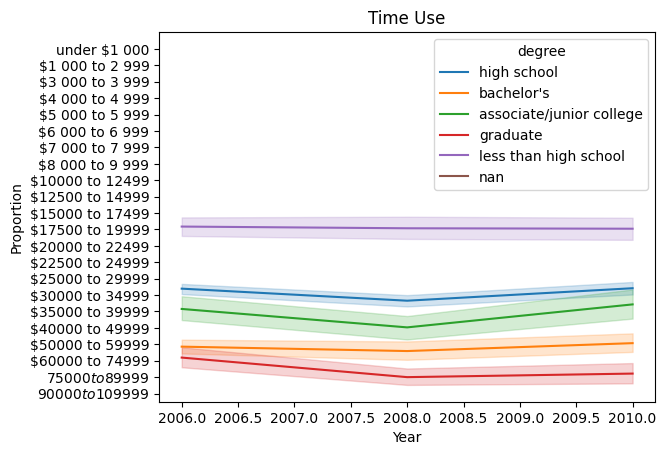

In [7]:
yrgss['degree'] = yrgss['degree'].astype(str)
sns.lineplot(data=yrgss,x='year',y='income06', hue="degree", legend = "brief").set(title='Time Use',xlabel=
                                                                   'Year',ylabel='Proportion')

Bar graph incorporating happiness, income, and party affiliation:

<ipython-input-18-8d0166b2569c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yrgss['partyid'] = yrgss['partyid'].astype(str)


<Axes: xlabel='partyid', ylabel='income06'>

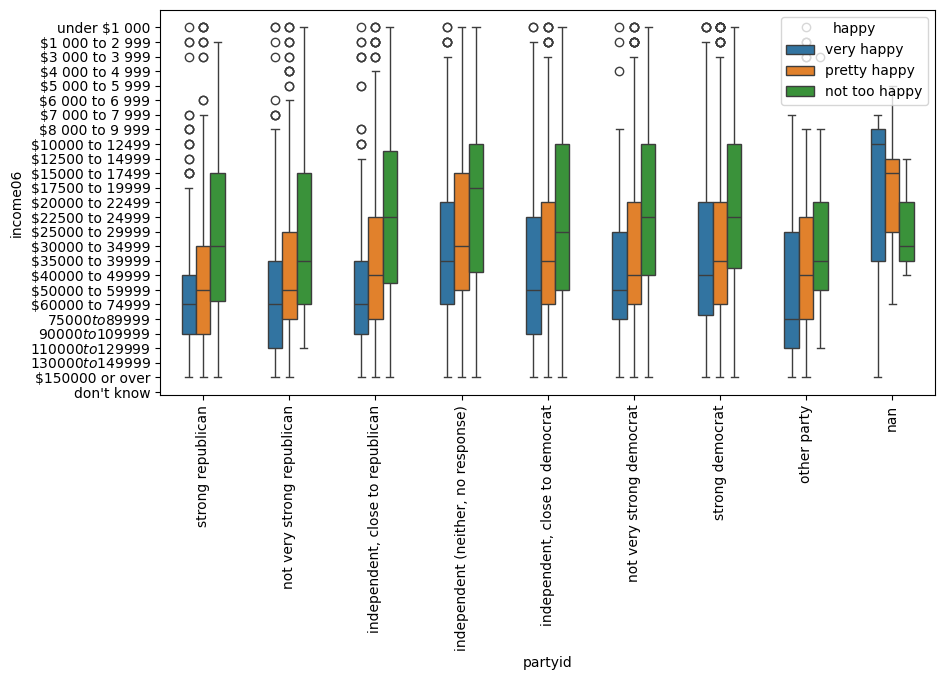

In [18]:
yrgss['partyid'] = yrgss['partyid'].astype(str)
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

plot = sns.boxplot(yrgss, x = 'partyid', y = 'income06', order = ['strong republican', 'not very strong republican', 'independent, close to republican', 'independent (neither, no response)', 'independent, close to democrat', 'not very strong democrat', 'strong democrat', 'other party', np.nan], width = 0.5, hue = 'happy', hue_order = ['very happy', 'pretty happy', 'not too happy'], ax=ax)
plt.setp(plot.get_xticklabels(), rotation=90)
plot